In [76]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import cv2.aruco as aruco

In [77]:
def load_coefficients(path):
    """ Loads camera matrix and distortion coefficients. """
    # FILE_STORAGE_READ
    cv_file = cv2.FileStorage(path, cv2.FILE_STORAGE_READ)

    # note we also have to specify the type to retrieve other wise we only get a
    # FileNode object back instead of a matrix
    camera_matrix = cv_file.getNode("K").mat()
    dist_matrix = cv_file.getNode("D").mat()

    cv_file.release()
    return [camera_matrix, dist_matrix]

def cv2_imshow(image):
    plt.figure(dpi=200)
    mode = len(np.shape(image))
    if mode==3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    elif mode==2:
        plt.imshow(image, cmap='gray')
    else:
        print('Unsuported image size')
        raise
    plt.xticks([]), plt.yticks([])
    plt.axis('off')

In [78]:
[camera_matrix, dist_matrix] = load_coefficients('13pro_coef')

In [79]:
camera_matrix

array([[3.55852183e+03, 0.00000000e+00, 1.23664944e+03],
       [0.00000000e+00, 3.36627923e+03, 1.71796295e+03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [80]:
dist_matrix

array([[ 0.15130654, -1.02234319, -0.02860906, -0.02566935,  1.70327243]])

In [81]:
img = cv2.imread('marker.jpg')

In [82]:
h1, w1 = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(camera_matrix, dist_matrix, (h1, w1), 0, (h1, w1))
dst1 = cv2.undistort(img, camera_matrix, dist_matrix, None, newcameramtx)
x, y, w1, h1 = roi
dst1 = dst1[y:y + h1, x:x + w1]
img=dst1

In [83]:
img.shape

(3024, 3023, 3)

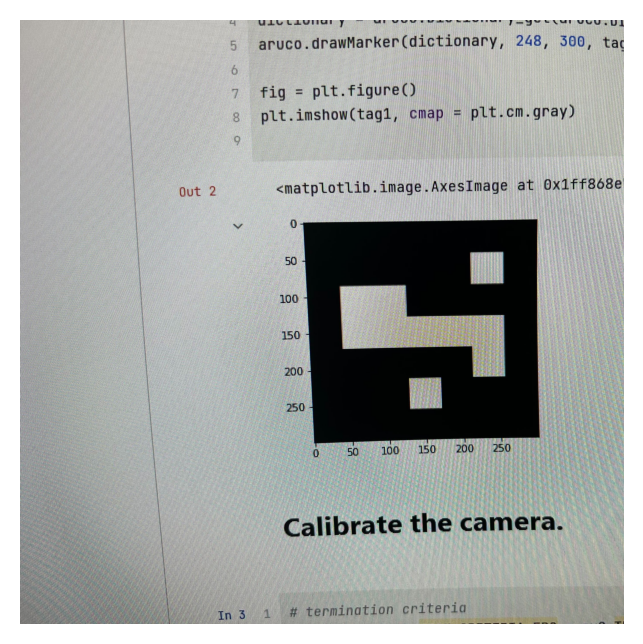

In [84]:
cv2_imshow(img)

In [85]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
aruco_dict = aruco.Dictionary_get(aruco.DICT_5X5_250)
parameters =  aruco.DetectorParameters_create()


corners, ids, rejectedImgPoints = aruco.detectMarkers(gray,aruco_dict,parameters=parameters)

In [86]:
if ids is not None:
    #Get rotation matrix rvec；and the  tvec：
    rvec, tvec, _ = aruco.estimatePoseSingleMarkers(corners, 0.05, camera_matrix, dist_matrix)
    # 估计每个标记的姿态并返回值rvet和tvec ---不同
    #rvec为旋转矩阵，tvec为位移矩阵
    # from camera coeficcients
    (rvec-tvec).any() # get rid of that nasty numpy value array error
    #print(rvec)



    #在画面上 标注auruco标签的各轴
    for i in range(rvec.shape[0]):
        # aruco.drawAxis(img, camera_matrix, dist_matrix, rvec[i, :, :], tvec[i, :, :], 0.03)
        result_img = cv2.drawFrameAxes(img, camera_matrix, dist_matrix, rvec[i, :, :], tvec[i, :, :],0.03)
        aruco.drawDetectedMarkers(img, corners,ids)


    ###### 显示id标记 #####
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img, "Id: " + str(ids), (0,200), font, 5, (0,0,255),10,cv2.LINE_AA)
    distance = ((tvec[0][0][2] + 0.02) * 0.0254) * 100  # 单位是米
    cv2.putText(img, 'distance:' + str(round(distance, 4)) + str('m'), (0, 400), font, 5, (0, 0, 255), 10,
                    cv2.LINE_AA)

In [89]:
cv2.imwrite('measure_distance.png', img)

True